<a href="https://www.kaggle.com/code/ozgurfirat05/ibb-barage-ml-prophet-zg-r-f-rat-meydan?scriptVersionId=121210842" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/istanbul-wide-dam-occupancy-rates/dam_occupancy.csv


In [2]:
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
baraj=pd.read_csv('/kaggle/input/istanbul-wide-dam-occupancy-rates/dam_occupancy.csv')

In [4]:
baraj.head(3)

,DATE,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
0,2005-01-01,44.62,388
1,2005-01-02,44.62,388
2,2005-01-03,44.47,386


In [5]:
baraj.columns=["tarih","oran","miktar"]

In [6]:
baraj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5941 entries, 0 to 5940
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tarih   5941 non-null   object 
 1   oran    5941 non-null   float64
 2   miktar  5941 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 139.4+ KB


In [7]:
baraj['tarih']=pd.to_datetime(baraj['tarih'])

In [8]:
baraj.head(3)

,tarih,oran,miktar
0,2005-01-01,44.62,388
1,2005-01-02,44.62,388
2,2005-01-03,44.47,386


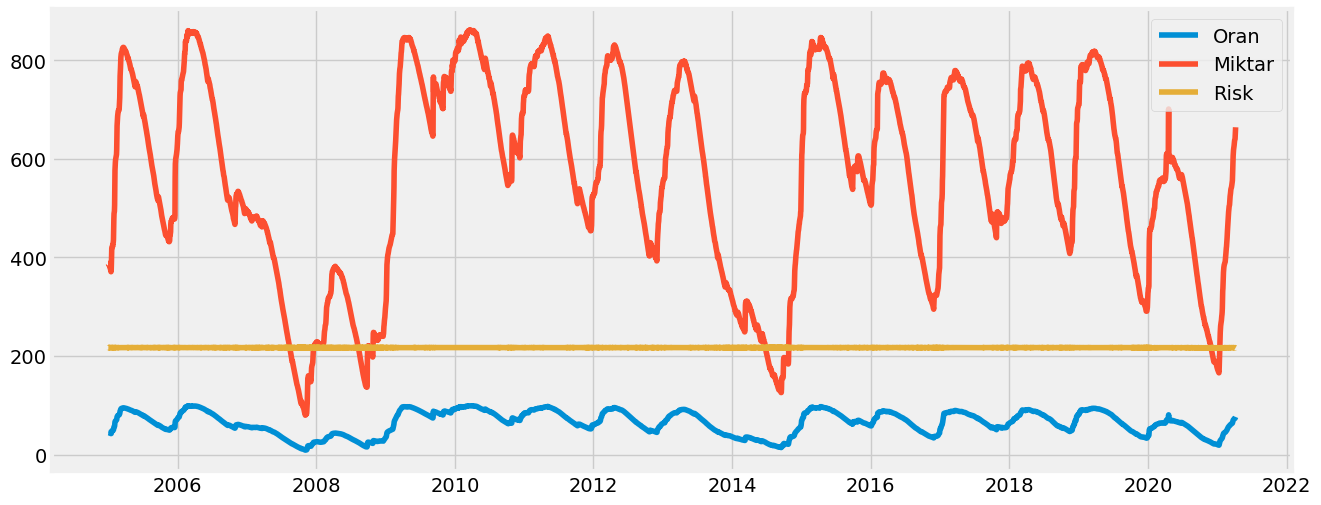

In [9]:
plt.figure(figsize=(16,6))
plt.style.use("fivethirtyeight")
plt.plot(baraj['tarih'],baraj['oran'])
plt.plot(baraj['tarih'],baraj['miktar'])
plt.plot(baraj['tarih'],baraj['miktar']/baraj['oran']*0.25*100)
plt.legend(["Oran","Miktar","Risk"])
plt.show()

In [10]:
baraj=baraj[["tarih","oran"]]

In [11]:
baraj.columns=['ds','y']

In [12]:
model=Prophet()
model.fit(baraj)

10:50:20 - cmdstanpy - INFO - Chain [1] start processing
10:50:25 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future=model.make_future_dataframe(periods=950)

In [14]:
tahmin=model.predict(future)

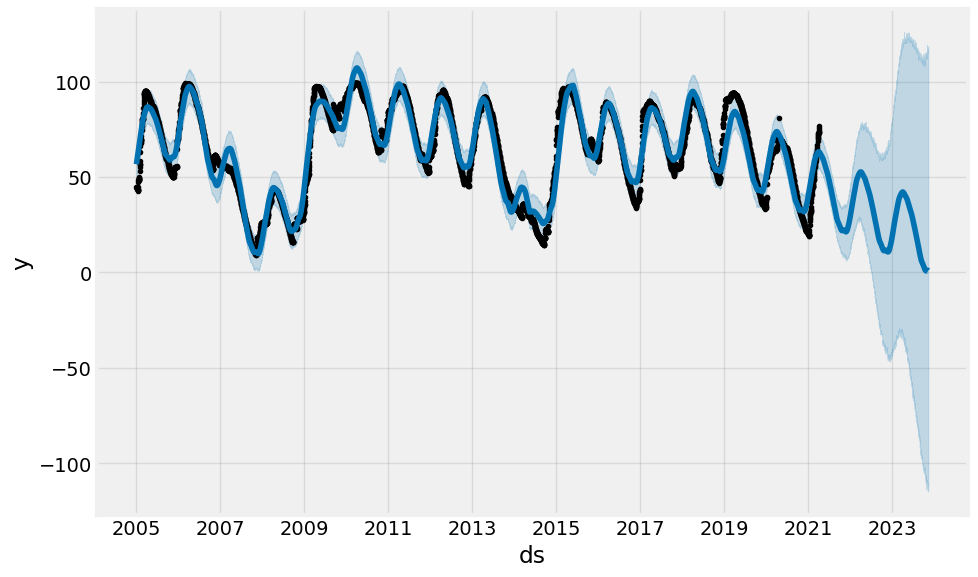

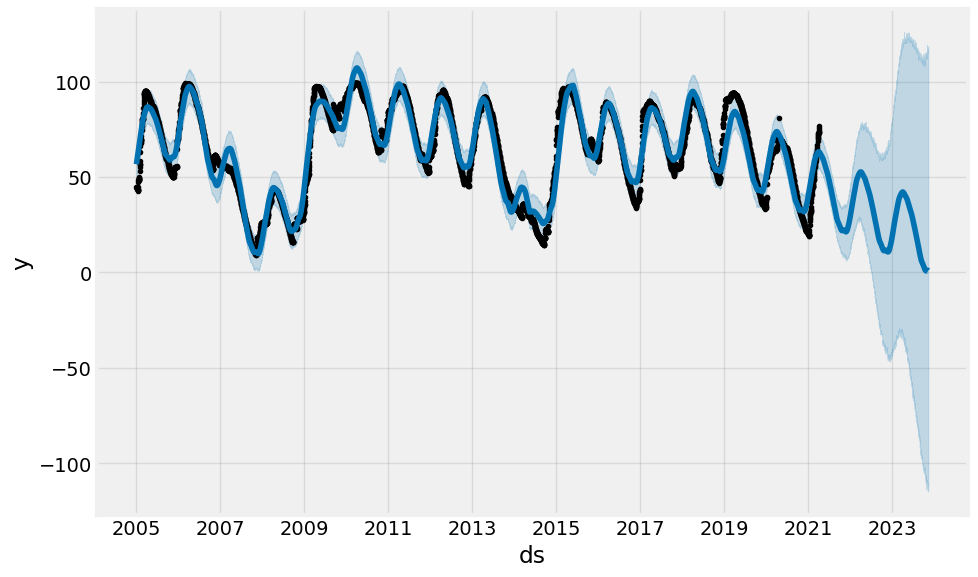

In [15]:
model.plot(tahmin)

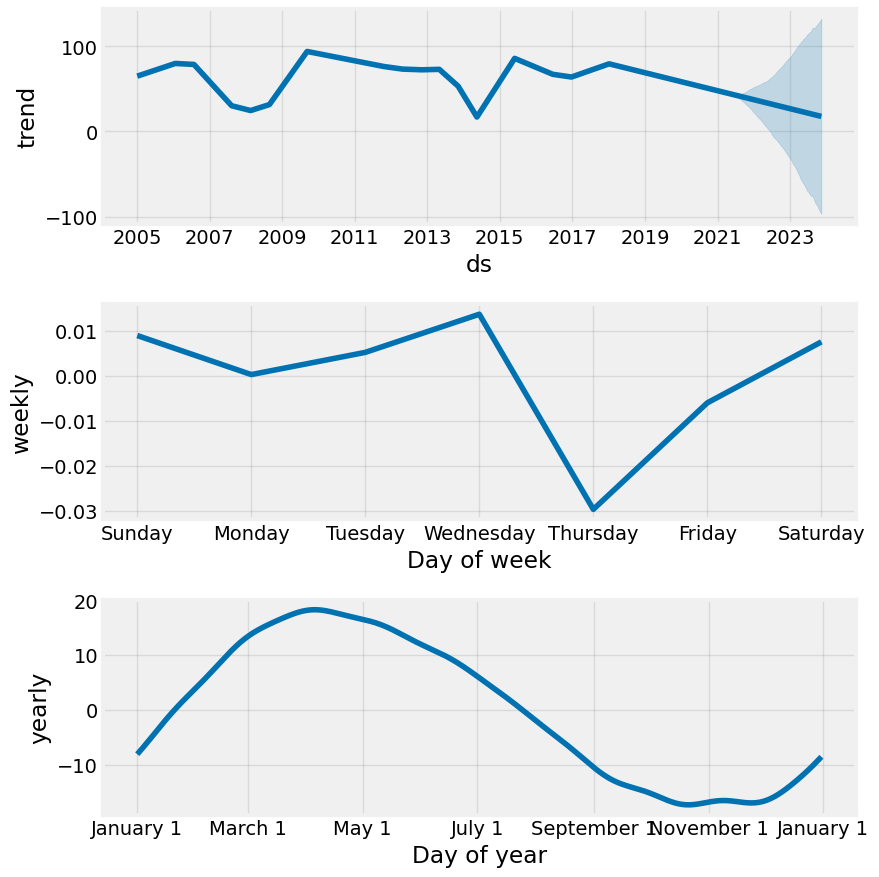

In [16]:
model.plot_components(tahmin);

In [17]:
from prophet.plot import plot_plotly

In [18]:
plot_plotly(model,tahmin)